In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loandefault/train.csv
/kaggle/input/loandefault/test.csv


In [53]:
data = pd.read_csv('/kaggle/input/loandefault/train.csv')

object_columns = data.columns[data.dtypes == 'object']
data = pd.get_dummies(data , columns =object_columns ).astype(int)
bool_columns = data.columns[data.dtypes == 'bool']

X = data.drop('Loan Status' ,axis = 1).values
y = (data['Loan Status'].values).reshape(-1 , 1)


In [54]:
from sklearn.model_selection import train_test_split  # Split data
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Choose the best model btw KNN and LR  , using GreadSearchCV : 
# Hyperparameters for Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}

# Hyperparameters for KNN
param_grid_knn = {'n_neighbors': [3, 7, 9, 11, 13, 15]}

# Initialize models
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()

# Grid search for Logistic Regression
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Grid search for KNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [55]:
# Print best parameters and scores
print ('knn best para' , grid_search_knn.best_params_)
print ('knn best score' , grid_search_knn.best_score_)
print ('lr best para' , grid_search_lr.best_params_)
print ('lr best score' , grid_search_lr.best_score_)

# the two models showed the same accuracy , let s choose LR 

knn best para {'n_neighbors': 13}
knn best score 0.9070811463590565
lr best para {'C': 0.01}
lr best score 0.9070811463590565


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


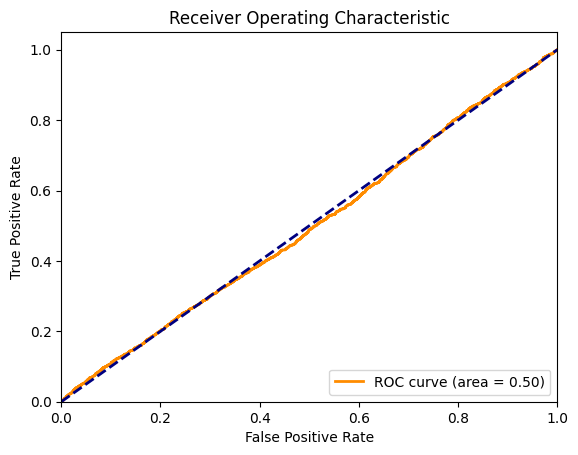

[1 0 0 ... 0 0 0]


In [56]:
from sklearn.metrics import roc_curve, auc  # ROC and AUC metrics
import matplotlib.pyplot as plt  # Plotting
import numpy as np  # Numerical operations
from sklearn.linear_model import LogisticRegression  # Logistic Regression

# Initialize and train the model with best parameters
model = LogisticRegression(max_iter=1000, **grid_search_lr.best_params_)
model.fit(X_train, y_train)

# Predict probabilities
y_pred = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Find optimal threshold
optimal_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_index]

# Apply the optimal threshold
y_pred = (y_pred >= optimal_threshold).astype(int)
print(y_pred)


In [57]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix  # Import metrics

# Apply optimal threshold to make final predictions

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)  # Confusion matrix

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8423
Precision: 0.10
Recall: 0.09
F1 Score: 0.10
Confusion Matrix:
[[16873  1513]
 [ 1678   175]]
